# PROJEKAT IZ PREDMETA "VEROVATNOĆA I STATISTIKA"

## TEMA: ŠMINKA (proizvođači, količina, dobavljači)

### Student: Teodora Šakotić 
### Profesor: Miloš Stanković

##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
##### Učitatavanje podataka iz tabele "makeup.csv"

#####  Navedena tabela sadrži sledeće kolone: serialNo, NYX, LOREAL, Quantity, ESSENCE, ANASTASIA, PROFUSION, Explore, Supplier.

#####  Statistickih metode koje su obrađene u projektu: 
#####  1. Primena linearne regresije,
#####  2. Primena višestruke regresije,
#####  3. Primena nelinearne regresije,
#####  4. Estimacija uslovnih verovatnoća određenih događaja,
#####  5. Estimacija funkcije gustine raspodele pomoću histograma ,
#####  6. Estimacija parametara raspodela pojedinačnih promenljivih (varijansa, standardna devijacija, kvantili),
#####  7. Estimacija parametara združenih raspodela (kovarijansa i koeficijent korelacije),
#####  8. Estimacija intervala poverenja ocena određenih parametara.

In [91]:
# učitavanje podataka iz tabele
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-talk')

data_por = pd.read_csv("makeup.csv")
data_por.head() 

,serialNo,NYX,LOREAL,Quantity,ESSENCE,ANASTASIA,PROFUSION,Explore,Supplier
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [92]:
atributes = ['NYX','LOREAL','Quantity', 'Supplier']
data_por = pd.read_csv("makeup.csv",usecols=atributes)
data_por.head() 

,NYX,LOREAL,Quantity,Supplier
0,337,118,4,0.92
1,324,107,4,0.76
2,316,104,3,0.72
3,322,110,3,0.80
4,314,103,2,0.65


In [93]:
data_temp = data_por["Quantity"].value_counts()# value_counts() funkcija: Rezultirajući objekat će biti u silaznom redosledu, tako da
                                             # prvi element je element koji se najčešće javlja
data_temp 

3    162
2    126
4    105
5     73
1     34
Name: Quantity, dtype: int64

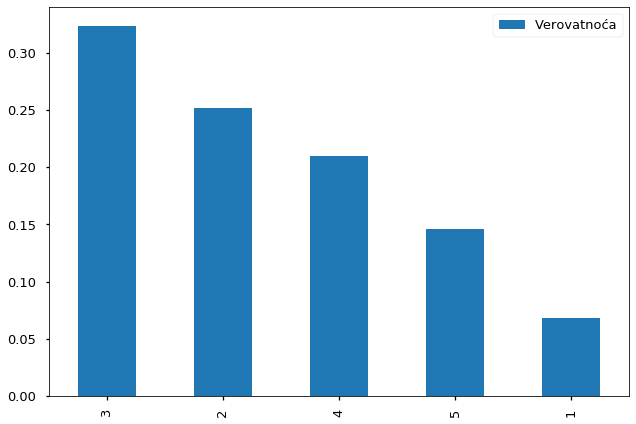

In [94]:
# Raspodela količina
P_S = pd.DataFrame(data_temp/data_temp.sum())
P_S.columns=["Verovatnoća"]
P_S.plot.bar()
plt.show() 

In [100]:
# Visoke NYX ocene
data_temp_NYX_high = (data_por["NYX"]>320).value_counts()
high_NYX_scores = data_temp_NYX_high[True]
print("Visoke NYX ocene")
high_NYX_scores

Visoke NYX ocene


197

In [101]:
# Srednje NYX ocene
data_temp_NYX_mid = ((data_por["NYX"]>=310) & (data_por["NYX"]<=320)).value_counts()
mid_NYX_scores = data_temp_NYX_mid[True]
print("Srednje NYX ocene")
mid_NYX_scores

Srednje NYX ocene


165

In [98]:
# Niske NYX ocene
data_temp_NYX_low = ((data_por["NYX"]<310)).value_counts()
low_NYX_scores = data_temp_NYX_low[True]
print("Niske NYX ocene")
low_NYX_scores

Low NYX Scores


138

In [103]:
# Visoke LOREAL ocene
data_temp_LOREAL_high = (data_por["LOREAL"]>110).value_counts()
high_LOREAL_scores = data_temp_LOREAL_high[True]
print("Visoke LOREAL ocene")
high_LOREAL_scores

Visoke LOREAL ocene


149

In [104]:
# Srednje LOREAL ocene
data_temp_LOREAL_mid = ((data_por["LOREAL"]>=105) & (data_por["LOREAL"]<=110)).value_counts()
mid_LOREAL_scores = data_temp_LOREAL_mid[True]
print("Srednje LOREAL ocene")
mid_LOREAL_scores

Srednje LOREAL ocene


175

In [105]:
# Niske LOREAL ocene
data_temp_LOREAL_low = ((data_por["LOREAL"]<105)).value_counts()
low_LOREAL_scores = data_temp_LOREAL_low[True]
print("Niske LOREAL ocene")
low_LOREAL_scores

Niske LOREAL ocene


176

In [106]:
# Visoke šanse za dobavljača
data_temp_Supplier_high = (data_por["Supplier"]>0.8).value_counts()
high_Supplier_scores = data_temp_Supplier_high[True]
print("Visoke Supplier ocene")
high_Supplier_scores

Visoke Supplier ocene


142

In [107]:
# Srednje šanse za dobavljača
data_temp_Supplier_mid = ((data_por["Supplier"]>=0.6) & (data_por["Supplier"]<=0.8)).value_counts()
mid_Supplier_scores = data_temp_Supplier_mid[True]
print("Srednje Supplier ocene")
mid_Supplier_scores

Srednje Supplier ocene


263

In [108]:
# Niske šanse za dobavljača
data_temp_Supplier_low = ((data_por["Supplier"]<0.6)).value_counts()
low_Supplier_scores = data_temp_Supplier_low[True]
print("Niske Supplier ocene")
low_Supplier_scores

Niske Supplier ocene


95

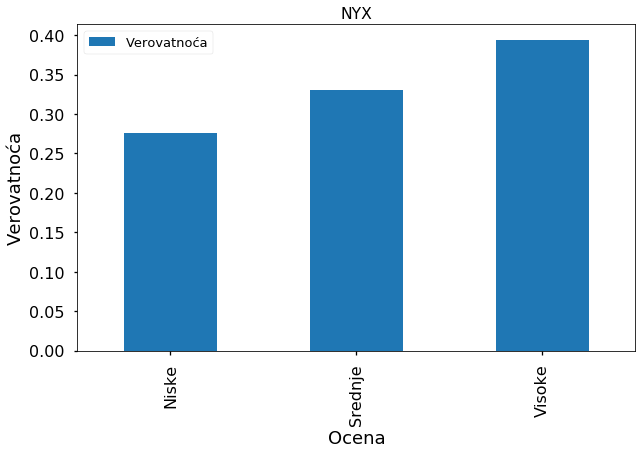

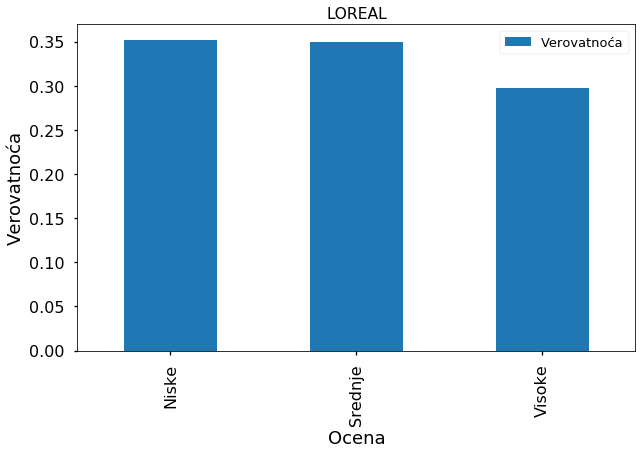

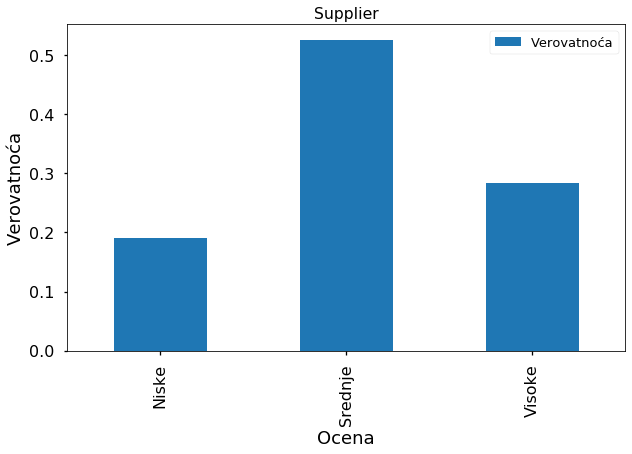

In [109]:
P_Scores_NYX = pd.DataFrame([low_NYX_scores, mid_NYX_scores, high_NYX_scores]/(high_NYX_scores+mid_NYX_scores+low_NYX_scores))
P_Scores_NYX.index = ["Niske","Srednje","Visoke"]
P_Scores_NYX.columns = ["Verovatnoća"]


P_Scores_LOREAL = pd.DataFrame([low_LOREAL_scores, mid_LOREAL_scores, high_LOREAL_scores]/(high_LOREAL_scores+mid_LOREAL_scores+low_LOREAL_scores))
P_Scores_LOREAL.index = ["Niske","Srednje","Visoke"]
P_Scores_LOREAL.columns = ["Verovatnoća"]


P_Scores_Supplier = pd.DataFrame([low_Supplier_scores, mid_Supplier_scores, high_Supplier_scores]/(high_Supplier_scores+mid_Supplier_scores+low_Supplier_scores))
P_Scores_Supplier.index = ["Niske","Srednje","Visoke"]
P_Scores_Supplier.columns = ["Verovatnoća"]


# Crtanje bar grafika za NYX:
P_Scores_NYX.plot.bar(figsize=(10,6),fontsize=16)
plt.xlabel("Ocena",fontsize=18)
plt.ylabel("Verovatnoća",fontsize=18)
plt.title('NYX')
plt.show()

# Crtanje bar grafika za LOREAL:
P_Scores_LOREAL.plot.bar(figsize=(10,6),fontsize=16)
plt.xlabel("Ocena",fontsize=18)
plt.ylabel("Verovatnoća",fontsize=18)
plt.title('LOREAL')
plt.show()

# Crtanje bar grafika za šansu za dobavljača:
P_Scores_Supplier.plot.bar(figsize=(10,6),fontsize=16)
plt.xlabel("Ocena",fontsize=18)
plt.ylabel("Verovatnoća",fontsize=18)
plt.title('Supplier')
plt.show()

In [77]:
data_temp = data_por.loc[data_por["NYX"]<310,"Supplier"]
data_temp=data_temp.value_counts()
data_temp

0.62    9
0.64    8
0.68    7
0.58    6
0.67    6
0.65    6
0.71    6
0.54    6
0.57    5
0.46    5
0.47    5
0.61    5
0.59    5
0.56    4
0.53    4
0.63    4
0.48    3
0.69    3
0.44    3
0.42    3
0.52    3
0.73    2
0.45    2
0.49    2
0.34    2
0.66    2
0.72    2
0.77    2
0.60    2
0.70    2
0.51    2
0.38    2
0.36    2
0.75    1
0.78    1
0.55    1
0.79    1
0.43    1
0.37    1
0.76    1
0.50    1
Name: Supplier, dtype: int64

In [20]:
data_temp1 = data_por["Supplier"].value_counts()
data_temp1

0.71    23
0.64    19
0.73    18
0.72    16
0.79    16
        ..
0.34     2
0.50     2
0.43     1
0.37     1
0.39     1
Name: Supplier, Length: 61, dtype: int64

In [21]:
#Uslovna verovatnoća niske NYX ocene sa šansom za dobavljača

P_Uslovna_Verovatnoca = pd.DataFrame(data_temp/data_temp1)
P_Uslovna_Verovatnoca.columns = ["Uslovna verovatnoća"]
P_Uslovna_Verovatnoca.head()

,Uslovna verovatnoća
0.34,1.0
0.36,1.0
0.37,1.0
0.38,1.0
0.39,NaN


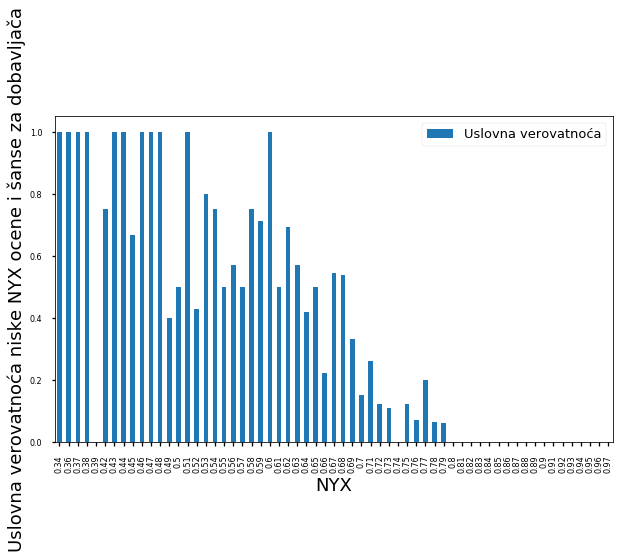

In [79]:
#Bar grafik uslovne verovatnoće

P_Uslovna_Verovatnoca.plot.bar(figsize=(10,6),fontsize=8)
plt.xlabel("NYX",fontsize=18)
plt.ylabel("Uslovna verovatnoća niske NYX ocene i šanse za dobavljača",fontsize=18)
plt.show()

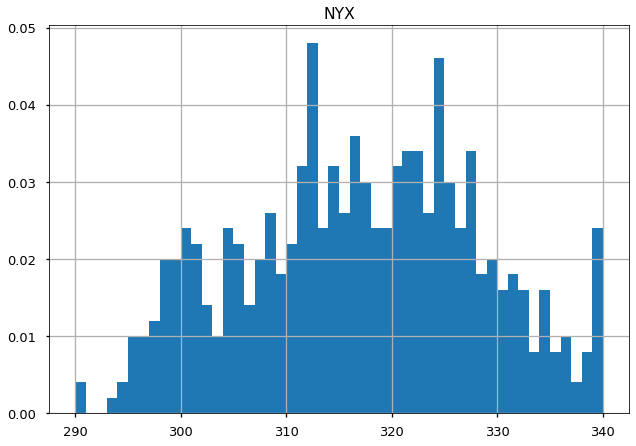

In [80]:
#NYX histogram

import pandas as pd

atributes = ['NYX']
df = pd.read_csv("makeup.csv",usecols=atributes)

hist = df.hist(density=True,bins=50) 
plt.show()

In [24]:
#Uslov za normalnu raspodelu
from scipy import stats

stats.kstest(df['NYX'].dropna().values.T, cdf='norm', args=(df['NYX'].dropna().values.mean(), df['NYX'].dropna().values.std()))

KstestResult(statistic=0.049893582249252666, pvalue=0.1604498373533897)

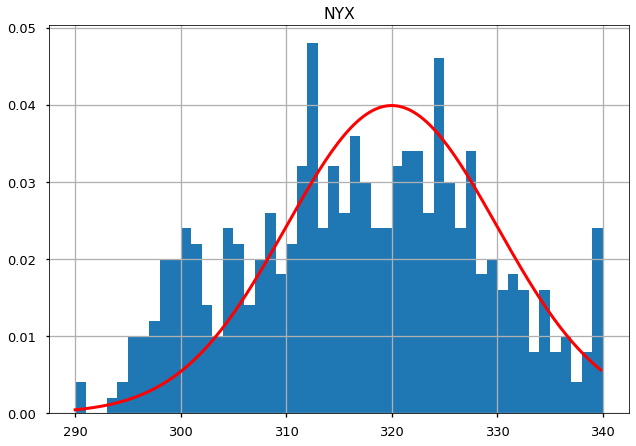

In [73]:
#Gausova kriva

from scipy.stats import norm

hist = df.hist(density=True,bins=50)

step=0.3
x = np.arange(290, 340, step)
m=320
sig=10
P_norm = norm.pdf(x, m, sig)

plt.plot(x, P_norm, 'r', linewidth=3.0)
plt.show()

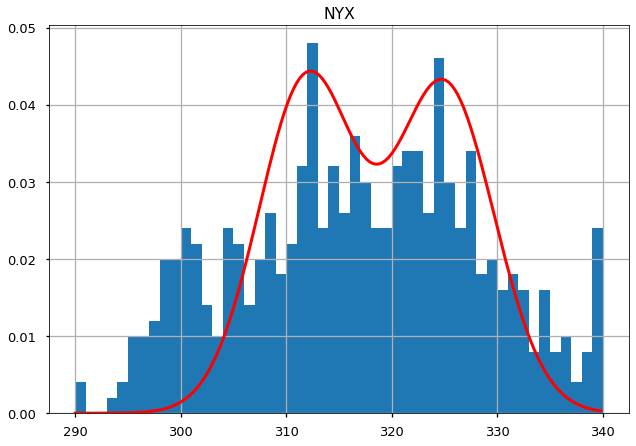

In [81]:
#Mešovita kriva

hist = df.hist(density=True,bins=50)
x = np.arange(290, 340, step)
m1=312
sig1=4.6
m2=325
sig2=4.7

P_norm_mix2 = np.array(0.5*norm.pdf(x, m1, sig1)+0.5*norm.pdf(x, m2, sig2))
plt.plot(x, P_norm_mix2, 'r', linewidth=3.0)
plt.show()

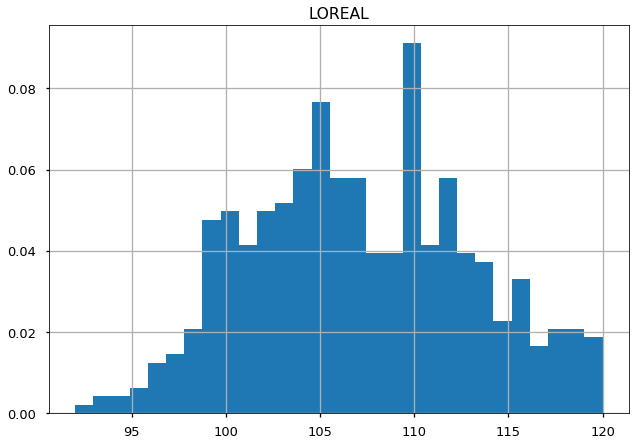

In [82]:
#LOREAL histogram

atributes = ['LOREAL']
df = pd.read_csv("makeup.csv",usecols=atributes)

hist = df.hist(density=True,bins=29) 
plt.show()

In [28]:
# Uslov za normalnu raspodelu
stats.kstest(df['LOREAL'].dropna().values.T, cdf='norm', args=(df['LOREAL'].dropna().values.mean(), df['LOREAL'].dropna().values.std()))

KstestResult(statistic=0.06686675668009989, pvalue=0.021816091652705517)

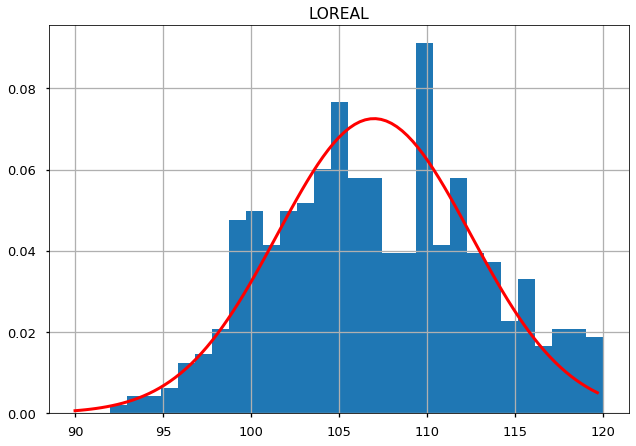

In [83]:
# Gausova kriva
from scipy.stats import norm

hist = df.hist(density=True,bins=29)

step=0.3
x = np.arange(90, 120, step)
m=107
sig=5.5
P_norm = norm.pdf(x, m, sig)

plt.plot(x, P_norm, 'r', linewidth=3.0)
plt.show()

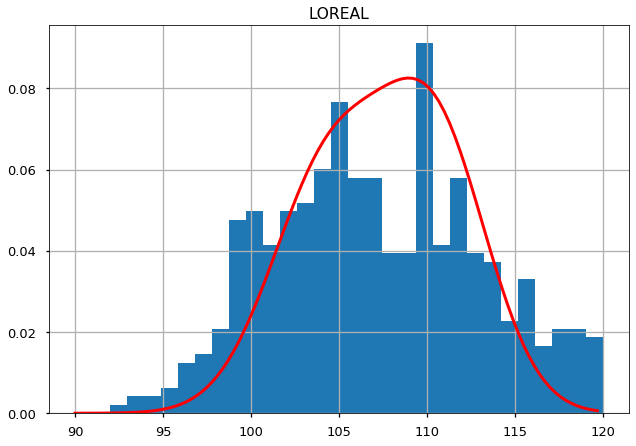

In [84]:
hist = df.hist(density=True,bins=29)
x = np.arange(90, 120, step)
m1=104.5
sig1=3.3
m2=110.5
sig2=3

P_norm_mix2 = np.array(0.5*norm.pdf(x, m1, sig1)+0.5*norm.pdf(x, m2, sig2))
plt.plot(x, P_norm_mix2, 'r', linewidth=3.0)
plt.show()

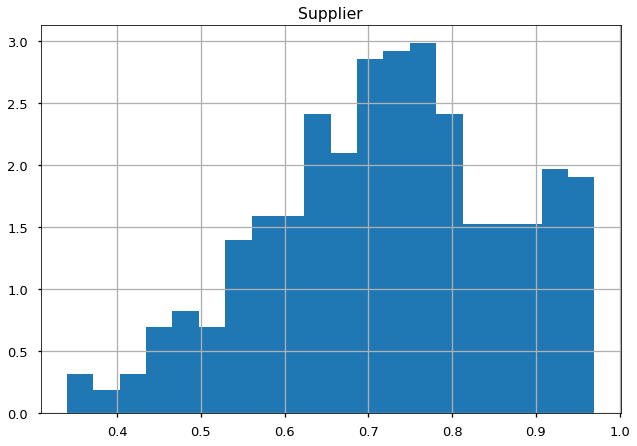

In [85]:
atributes = ['Supplier']
df = pd.read_csv("makeup.csv",usecols=atributes)

hist = df.hist(density=True,bins=20) 
plt.show()

In [32]:
# Uslov za normalnu raspodelu
stats.kstest(df['Supplier'].dropna().values.T, cdf='norm', args=(df['Supplier'].dropna().values.mean(), df['Supplier'].dropna().values.std()))

KstestResult(statistic=0.045631910653061714, pvalue=0.24181167784562735)

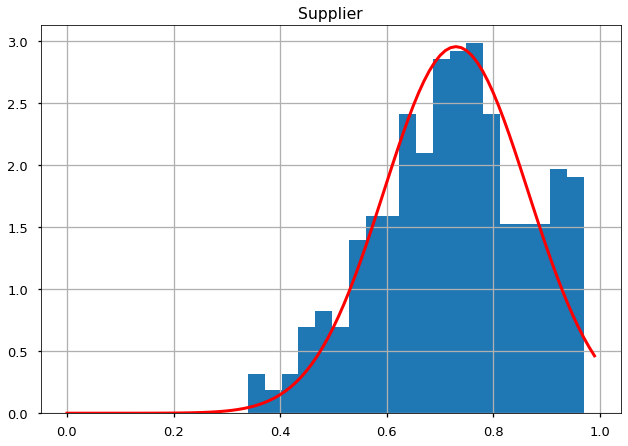

In [86]:
# Gausova kriva
from scipy.stats import norm

hist = df.hist(density=True,bins=20)

step=0.01
x = np.arange(0, 1, step)
m=0.73
sig=0.135
P_norm = norm.pdf(x, m, sig)

plt.plot(x, P_norm, 'r', linewidth=3.0)
plt.show()

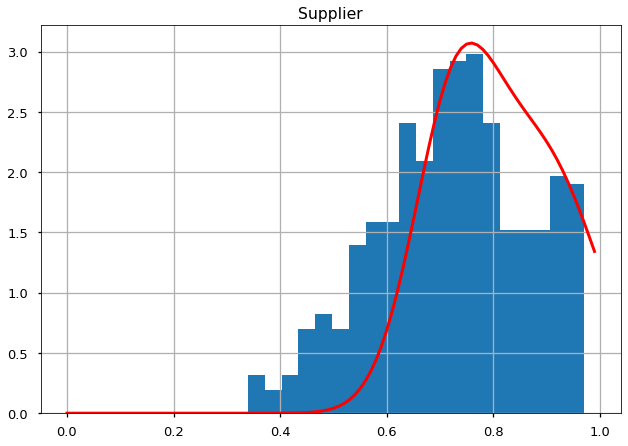

In [87]:
# Mešovita kriva
hist = df.hist(density=True,bins=20)
x = np.arange(0, 1, step)
m1=0.73
sig1=0.08
m2=0.9
sig2=0.1

P_norm_mix2 = np.array(0.5*norm.pdf(x, m1, sig1)+0.5*norm.pdf(x, m2, sig2))
plt.plot(x, P_norm_mix2, 'r', linewidth=3.0)
plt.show()

### Metode: describe(), kvantili, koeficijent korelacije

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

plt.style.use('seaborn-talk')
atributes = ['NYX','LOREAL','Quantity', 'Supplier']
data_por = pd.read_csv("makeup.csv",usecols=atributes)
data_por.head()

,NYX,LOREAL,Quantity,Supplier
0,337,118,4,0.92
1,324,107,4,0.76
2,316,104,3,0.72
3,322,110,3,0.80
4,314,103,2,0.65


In [89]:
data_por.describe() # describe koristi se za pregled nekih osnovnih statističkih detalja poput count, mean, std itd.

,NYX,LOREAL,Quantity,Supplier
count,500.000000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,0.72174
std,11.295148,6.081868,1.143512,0.14114
min,290.000000,92.000000,1.000000,0.34000
25%,308.000000,103.000000,2.000000,0.63000
50%,317.000000,107.000000,3.000000,0.72000
75%,325.000000,112.000000,4.000000,0.82000
max,340.000000,120.000000,5.000000,0.97000


In [37]:
# Kvantali su presečene tačke koje dele opseg distribucije verovatnoće u 
# neprekidne intervale sa jednakim verovatnoćama ili deljenje opažanja u uzorku na isti način.

# Kvantil reda 0.2
data_por.quantile(0.2)

NYX         306.00
LOREAL      102.00
Quantity      2.00
Supplier      0.61
Name: 0.2, dtype: float64

In [38]:
# Koeficijent korelacije je brojčana mera neke vrste korelacije,
# znači statistički odnos između dve promenljive.

#Koeficijent korelacije NYX i LOREAL ocena

data_por.cov()['NYX']['LOREAL']/(data_por.std()['NYX']*data_por.std()['LOREAL'])

0.827200403531722

In [39]:
data_por.cov()['NYX']['Supplier']/(data_por.std()['NYX']*data_por.std()['Supplier'])

0.8103506354632607

In [40]:
data_por.cov()['LOREAL']['Supplier']/(data_por.std()['LOREAL']*data_por.std()['Supplier'])

0.7922276143050837

In [41]:
alpha=0.05

print("Vrednost estimacije: " + str(data_por.mean()['NYX'])) #estmaciona vrednost

red_kvantila=1-alpha/2
Kvantil = stats.norm.ppf(red_kvantila)
                  
margin = Kvantil * (data_por.std()['NYX']/len(data_por)**0.5)

interval_poverenja_MO = (data_por.mean()['NYX'] - margin, data_por.mean()['NYX'] + margin)
interval_poverenja_MO

Vrednost estimacije: 316.472


(315.4819547852474, 317.46204521475255)

In [42]:
alpha=0.05

print("Vrednost estimacije: " + str(data_por.mean()['LOREAL'])) #estmaciona vrednost

red_kvantila=1-alpha/2
Kvantil = stats.norm.ppf(red_kvantila)
                  
margin = Kvantil * (data_por.std()['LOREAL']/len(data_por)**0.5)

interval_poverenja_MO = (data_por.mean()['LOREAL'] - margin, data_por.mean()['LOREAL'] + margin)
interval_poverenja_MO

Vrednost estimacije: 107.192


(106.6589105907588, 107.72508940924119)

In [43]:
alpha=0.05

print("Vrednost estimacije: " + str(data_por.mean()['Supplier'])) #estimaciona vrednost

red_kvantila=1-alpha/2
Kvantil = stats.norm.ppf(red_kvantila)
                  
margin = Kvantil * (data_por.std()['Supplier']/len(data_por)**0.5)

interval_poverenja_MO = (data_por.mean()['Supplier'] - margin, data_por.mean()['Supplier'] + margin)
interval_poverenja_MO

Vrednost estimacije: 0.7217399999999996


(0.7093687254551472, 0.734111274544852)

### Linearna regresija

In [44]:
HW=pd.read_csv('makeup.csv')
print(HW.head())
print("--------------------------")
cols = [0,2,3,4,5, 6, 7]
HW.drop(HW.columns[cols],axis=1,inplace=True)
print(HW.head())
print("--------------------------")


   serialNo  NYX  LOREAL  Quantity  ESSENCE  ANASTASIA  PROFUSION  Explore  \
0         1  337     118         4      4.5        4.5       9.65        1   
1         2  324     107         4      4.0        4.5       8.87        1   
2         3  316     104         3      3.0        3.5       8.00        1   
3         4  322     110         3      3.5        2.5       8.67        1   
4         5  314     103         2      2.0        3.0       8.21        0   

   Supplier  
0      0.92  
1      0.76  
2      0.72  
3      0.80  
4      0.65  
--------------------------
   NYX  Supplier
0  337      0.92
1  324      0.76
2  316      0.72
3  322      0.80
4  314      0.65
--------------------------


In [45]:
HW.columns=['NYX','Supplier'] 
HW.head()

,NYX,Supplier
0,337,0.92
1,324,0.76
2,316,0.72
3,322,0.80
4,314,0.65


In [46]:
A=np.array(HW['NYX'])
A=np.array([np.ones(len(A)),A])
y=np.array(HW['Supplier'])
print(A.shape,y.shape)

w1 = np.linalg.lstsq(A.T,y)[0]
w1

(2, 500) (500,)


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([-2.48281467,  0.01012587])

In [47]:
def f(x,w):
    return w[0]+w[1]*x

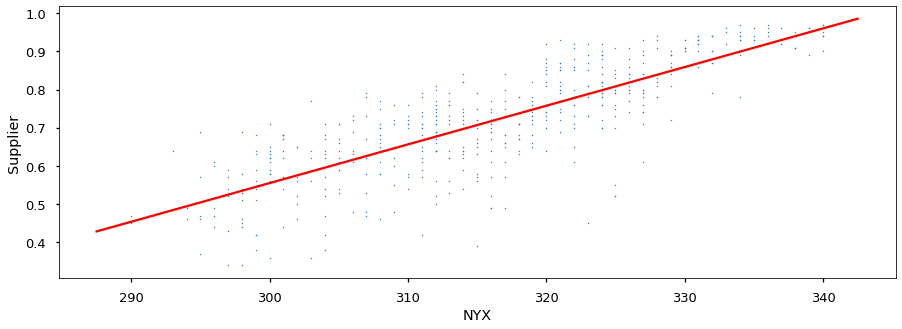

In [48]:
ax=HW.plot(kind='scatter',s=1,x='NYX',y='Supplier',figsize=[15,5])
x0,x1=plt.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'r')
plt.show()

In [49]:
A=np.array(HW['Supplier'])
A=np.array([np.ones(len(A)),A])
y=np.array(HW['NYX'])
print(A.shape,y.shape)

w1 = np.linalg.lstsq(A.T,y)[0]
w1

(2, 500) (500,)


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([269.6667751 ,  64.85053468])

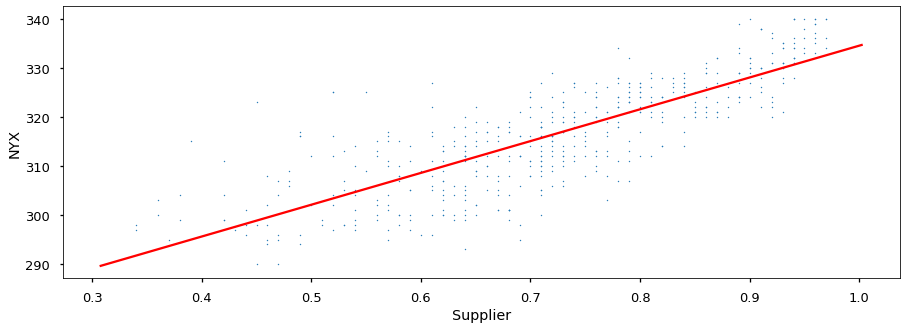

In [50]:
ax=HW.plot(kind='scatter',s=1,x='Supplier',y='NYX',figsize=[15,5])
x0,x1=plt.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'r')
plt.show()

### Kvadratna regresija

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


w2= [307.4192614  -47.43778562  80.05054462]


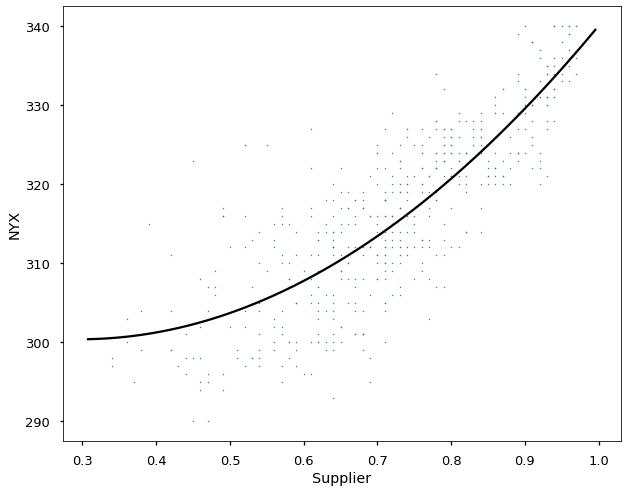

In [51]:
A=np.array(HW['Supplier'])
A=np.array([np.ones(len(A)),A,A**2])
y=np.array(HW['NYX'])

w2 = np.linalg.lstsq(A.T,y)[0] 
print('w2=',w2)
def f2(x,w):
    return w[0]+w[1]*x+w[2]*x**2

ax=HW.plot(kind='scatter',s=1,x='Supplier',y='NYX',figsize=[10,8])
x0,x1=plt.xlim()

opseg=x1-x0
X=np.arange(x0,x1,opseg/100.)
ax.plot(X,f2(X,w2),'k')
plt.show()

### Metode: describe(), koeficijent korelacije, kvantil, standardna devijacija, kovarijansa

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from scipy import stats
from statsmodels.formula.api import ols

df=pd.read_csv('makeup.csv')
df.head()

,serialNo,NYX,LOREAL,Quantity,ESSENCE,ANASTASIA,PROFUSION,Explore,Supplier
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
plt.style.use('seaborn-talk')
atributi = ['NYX','LOREAL']
data_por = pd.read_csv("makeup.csv",usecols=atributi)
data_por.head()

,NYX,LOREAL
0,337,118
1,324,107
2,316,104
3,322,110
4,314,103


In [3]:
data_por.describe()

,NYX,LOREAL
count,500.000000,500.000000
mean,316.472000,107.192000
std,11.295148,6.081868
min,290.000000,92.000000
25%,308.000000,103.000000
50%,317.000000,107.000000
75%,325.000000,112.000000
max,340.000000,120.000000


In [4]:
# Koeficijent korelacije broja umetnickih dela velikih i malih dimenzija
data_por.corr()

,NYX,LOREAL
NYX,1.0000,0.8272
LOREAL,0.8272,1.0000


In [5]:
# Kvantil reda 0.7
data_por.quantile(0.7)

NYX       323.3
LOREAL    110.0
Name: 0.7, dtype: float64

In [6]:
# Standardna devijacija
data_por.std()

NYX       11.295148
LOREAL     6.081868
dtype: float64

In [7]:
# Kovarijansa
data_por.cov()

,NYX,LOREAL
NYX,127.580377,56.825026
LOREAL,56.825026,36.989114


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from scipy import stats
from statsmodels.formula.api import ols

df=pd.read_csv('makeup.csv')
df.head()

,serialNo,NYX,LOREAL,Quantity,ESSENCE,ANASTASIA,PROFUSION,Explore,Supplier
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


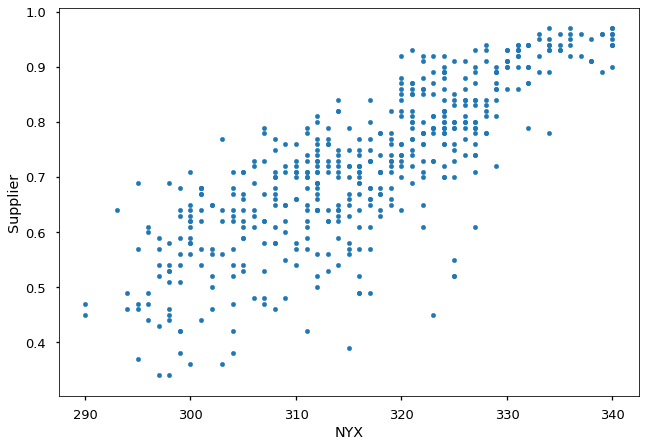

In [53]:
import pandas as pd
df=pd.read_csv('makeup.csv')
df.plot(kind="scatter",x="NYX",y="Supplier")

### Višestruka regresija

In [54]:
# više ulaznih promenljivih i 1 izlazna koja zavisi od više ulaznih
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from scipy import stats
from statsmodels.formula.api import ols

df=pd.read_csv('makeup.csv')
df.head()

,serialNo,NYX,LOREAL,Quantity,ESSENCE,ANASTASIA,PROFUSION,Explore,Supplier
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [55]:
model1 = ols("NYX ~ Supplier", df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    NYX   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     952.5
Date:                Fri, 27 Dec 2019   Prob (F-statistic):          1.09e-117
Time:                        18:32:41   Log-Likelihood:                -1653.9
No. Observations:                 500   AIC:                             3312.
Df Residuals:                     498   BIC:                             3320.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    269.6668      1.545    174.514      0.0

In [56]:
model3 = ols("Supplier ~ NYX * LOREAL", df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:               Supplier   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     392.7
Date:                Fri, 27 Dec 2019   Prob (F-statistic):          1.42e-130
Time:                        18:32:42   Log-Likelihood:                 574.16
No. Observations:                 500   AIC:                            -1140.
Df Residuals:                     496   BIC:                            -1123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1968      1.618     -1.358      0.1

In [57]:
model4 = ols("LOREAL ~ Supplier", df).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                 LOREAL   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     839.4
Date:                Fri, 27 Dec 2019   Prob (F-statistic):          6.73e-109
Time:                        18:32:43   Log-Likelihood:                -1364.7
No. Observations:                 500   AIC:                             2733.
Df Residuals:                     498   BIC:                             2742.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.5534      0.867     95.271      0.0

### Nelinearna regresija

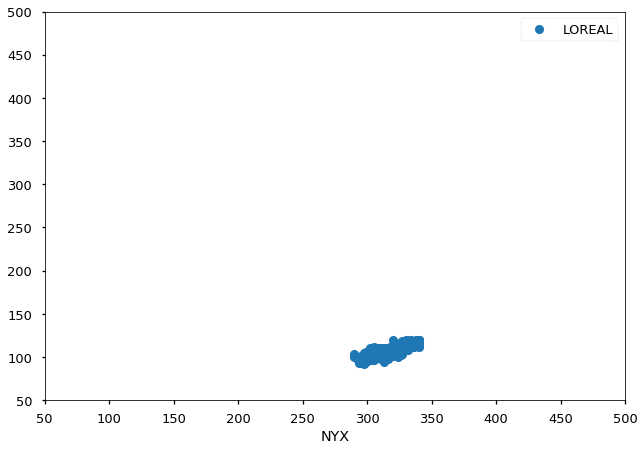

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from scipy import stats


# Ucitavanje podataka:
df=pd.read_csv('makeup.csv')

# plotovanje
df.plot('NYX', 'LOREAL', style='o')

plt.xlim([50,500])
plt.ylim([50,500])
plt.show()


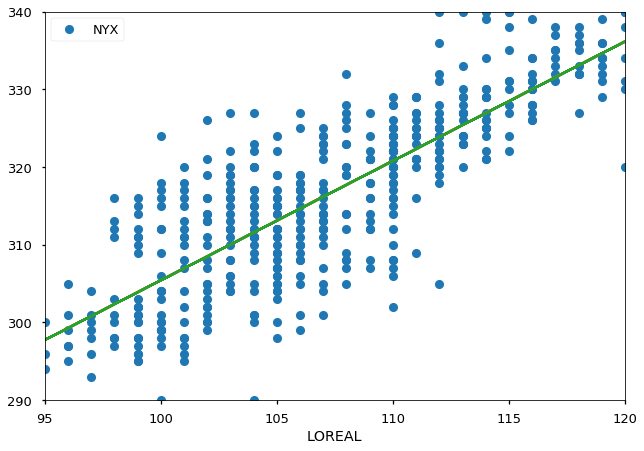

In [59]:
Rez1= sm.ols('NYX ~ LOREAL', df).fit()
Rez2 = sm.ols('NYX ~ LOREAL', df[:-2]).fit()  # iskljucujemo poslednju tacku koja deluje kao "outlier"
df.plot('LOREAL', 'NYX', style='o')
plt.plot(df.LOREAL, Rez1.fittedvalues)
plt.plot(df.LOREAL[:-2], Rez2.fittedvalues)
plt.xlim([95,120])
plt.ylim([290,340])
plt.show()

In [60]:
# Rezime regresije:
print(Rez1.summary())
print(Rez2.summary())

                            OLS Regression Results                            
Dep. Variable:                    NYX   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1079.
Date:                Fri, 27 Dec 2019   Prob (F-statistic):          9.29e-127
Time:                        18:32:48   Log-Likelihood:                -1632.9
No. Observations:                 500   AIC:                             3270.
Df Residuals:                     498   BIC:                             3278.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    151.7968      5.021     30.234      0.0

In [61]:
# Estimacija srednje vrednosti iz uzorka
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

atributi = ['NYX'] # uzimamo NYX
df = pd.read_csv("makeup.csv",usecols=atributi)
df.head()
df.shape

(500, 1)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:412: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


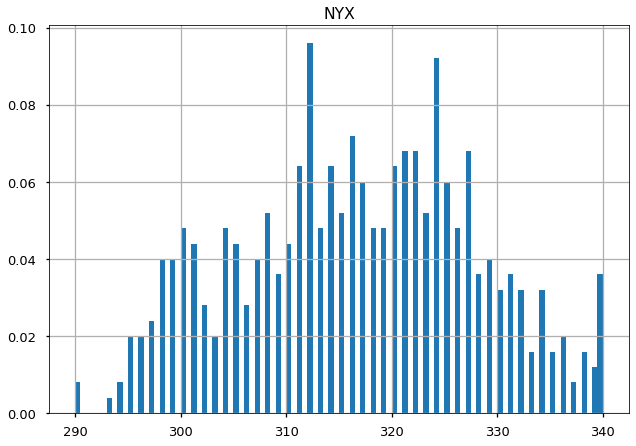

In [62]:
#histogram
hist = df.hist(normed=True,bins=100) 
plt.show()

In [63]:
df.describe() # ovom naredbom pandas automatski izracuna karakteristicne velicine 

,NYX
count,500.000000
mean,316.472000
std,11.295148
min,290.000000
25%,308.000000
50%,317.000000
75%,325.000000
max,340.000000


In [64]:
uzorak=df.sample(10)
uzorak.values.mean()

312.0

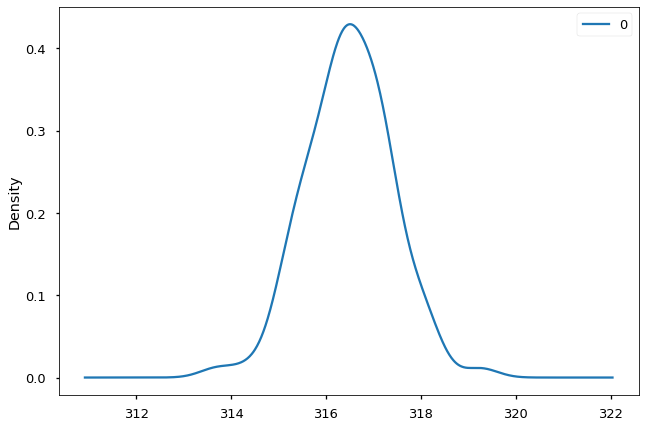

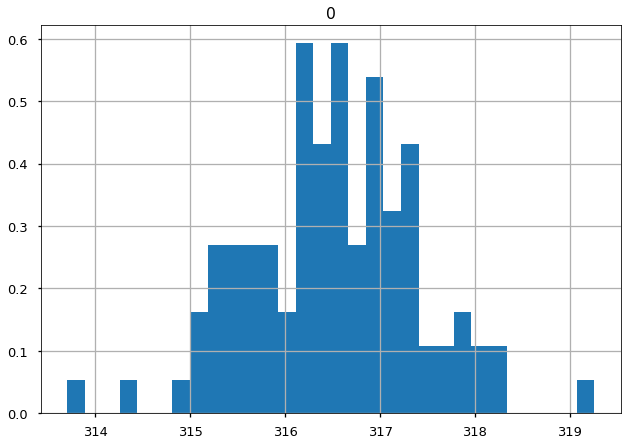

In [65]:
# estimiramo srednju vrednost uzimajući samo manji uzorak iz celog:
estimatori_srednje_vrednosti = []       
broj_uz_as=50
velicina_uzorka=100
broj_estimacija_srednjih_vrednosti=20   # ovo je broj estimacija, svaki je baziran na uzorku veličine 'velicina_uzorka'
for x in range(velicina_uzorka):         # Generišemo 20 uzorak
    
    uzorak=df.sample(velicina_uzorka)
    estimatori_srednje_vrednosti.append( uzorak.values.mean() )
    
    # ili:
    #uzorak = np.random.choice(a= df.values, size=velicina_uzorka)
    #estimatori_srednje_vrednosti.append( uzorak.mean() )
    
# plotujemo estimaciju gustine verovatnoće raspodele srednjih vrednosti (pomoću histograma) - vidimo da je približno normalna!  
pd.DataFrame(estimatori_srednje_vrednosti).plot(kind="density")   

# histogram srednjih vrednosti:
hist = pd.DataFrame(estimatori_srednje_vrednosti).hist(normed=True,bins=30) 
plt.show()

### Intervali poverenja

In [66]:
# interval poverenja za ocenu srednje vrednosti:

std=df.std()['NYX']
alpha=0.05   # nivo poverenja je 1-alpha=0.95

print(estimatori_srednje_vrednosti[0])  # štampamo estimranu vrednost

#SVOĐENJE NA Z-RASPODELU (N(0,1))
red_kvantila=1-alpha/2
Kvantil = stats.norm.ppf(red_kvantila)  # Kvantil odgovarajućeg reda Z raspodele (normalna (0,1) raspodela)
                  
margina = Kvantil * (std/velicina_uzorka**0.5)

interval_poverenja = (estimatori_srednje_vrednosti[0] - margina, estimatori_srednje_vrednosti[0] + margina)  
print(interval_poverenja)

315.8
(313.58619159901485, 318.01380840098517)


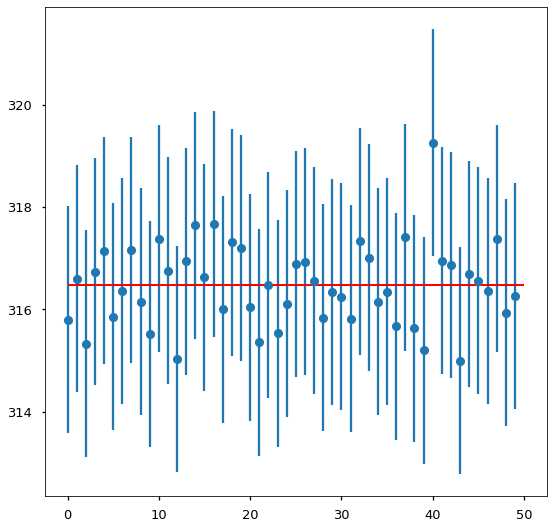

In [67]:
# crtanje svih intervala poverenja:

intervali_poverenja=[]
for i in range(0,50):
    intervali_poverenja.append((estimatori_srednje_vrednosti[i] - margina, estimatori_srednje_vrednosti[i] + margina))
    
# crtanje intervala poverenja:

plt.figure(figsize=(9,9))

# crtamo intervale pomoću plt.errorbar:
plt.errorbar(x=np.arange(0, 50), 
             y=estimatori_srednje_vrednosti[0:50], 
             yerr=[(gornja-donja)/2 for gornja,donja in intervali_poverenja],
             fmt='o')


plt.hlines(xmin=0, xmax=broj_uz_as,
           y=df.mean()['NYX'], 
           linewidth=2.0,
           color="red")

plt.show()

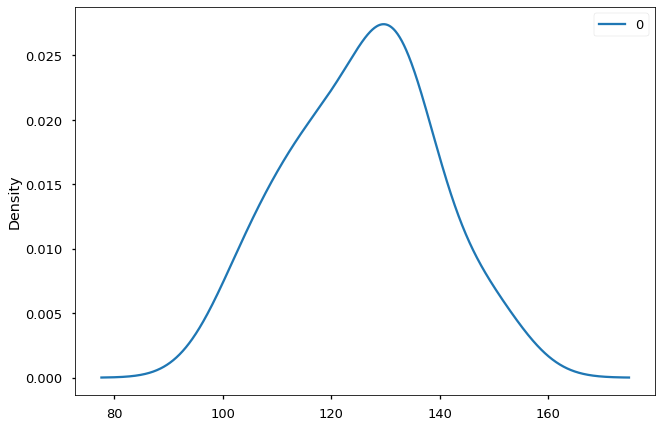

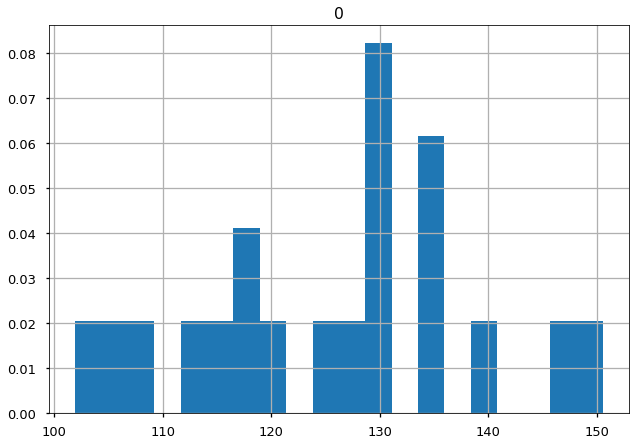

In [68]:
# hoćemo da estimiramo varijansu uzimajući samo manji uzorak iz celog:
estimatori_varijanse = []       
broj_uz_as=50
velicina_uzorka=100
broj_estimacija_varijansi=20   # ovo je broj estimacija, svaki je baziran na uzorku velicine 'velicina_uzorka'
for x in range(broj_estimacija_varijansi):         # Generišemo 200 uzoraka
    
    uzorak=df.sample(velicina_uzorka)
    estimatori_varijanse.append( uzorak.var()['NYX'] )
    
    # ili:
    #uzorak = np.random.choice(a= df.values, size=velicina_uzorka)
    #estimatori_varijanse.append( uzorak.var(ddof=1) )
    
# plotujemo estimaciju gustine verovatnoće raspodele ocena varijansi (pomocu histograma) - vidimo da je približno normalna!  
pd.DataFrame(estimatori_varijanse).plot(kind="density")   

# histogram ocena varijansi:
hist = pd.DataFrame(estimatori_varijanse).hist(normed=True,bins=20) 
plt.show()

In [69]:
# intervali poverenja:

alpha=0.05   # nivo poverenja je 1-alpha=0.95

print(estimatori_varijanse[0])  # štampamo estimiranu vrednost


Kvantil1 = stats.chi2.ppf(1-alpha/2, df=velicina_uzorka-1)  # Kvantil odgovarajućeg reda hi kvadrat raspodele sa n-1 stepeni slobode
Kvantil2 = stats.chi2.ppf(alpha/2, df=velicina_uzorka-1)  # Kvantil odgovarajućeg reda hi kvadrat raspodele sa n-1 stepeni slobode
   

interval_poverenja = ((velicina_uzorka-1)*estimatori_varijanse[0]/Kvantil1, (velicina_uzorka-1)*estimatori_varijanse[0]/Kvantil2)  
print(interval_poverenja)


101.92676767676768
(78.57493959220042, 137.54909243006105)


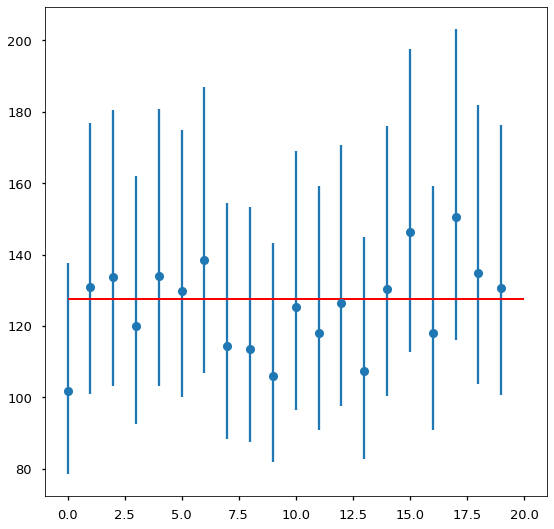

In [70]:
#crtanje svih intervala poverenja
intervali_poverenja=[]
for i in range(0,broj_estimacija_varijansi):
    intervali_poverenja.append(((velicina_uzorka-1)*estimatori_varijanse[i]/Kvantil1, (velicina_uzorka-1)*estimatori_varijanse[i]/Kvantil2))
    
# crtanje intervala poverenja:

plt.figure(figsize=(9,9))

# crtamo intervale pomoću plt.errorbar:
plt.errorbar(x=np.arange(0, broj_estimacija_varijansi), 
             y=estimatori_varijanse[0:broj_estimacija_varijansi], 
             yerr=np.stack((estimatori_varijanse-np.array(intervali_poverenja)[:,0], np.array(intervali_poverenja)[:,1]-estimatori_varijanse)),
             fmt='o')

plt.hlines(xmin=0, xmax=broj_estimacija_varijansi,
           y=df.var()['NYX'], 
           linewidth=2.0,
           color="red")

plt.show()

### Veza izmedju NYX-a i LOREAL-a

In [9]:
# Pre regresije naci koeficijent korelacije za NYX i LOREAL
plt.style.use('seaborn-talk')
atributi = ['NYX', 'LOREAL']
data_por = pd.read_csv("makeup.csv",usecols=atributi)
data_por.head()

,NYX,LOREAL
0,337,118
1,324,107
2,316,104
3,322,110
4,314,103


In [10]:
data_por.corr()

,NYX,LOREAL
NYX,1.0000,0.8272
LOREAL,0.8272,1.0000


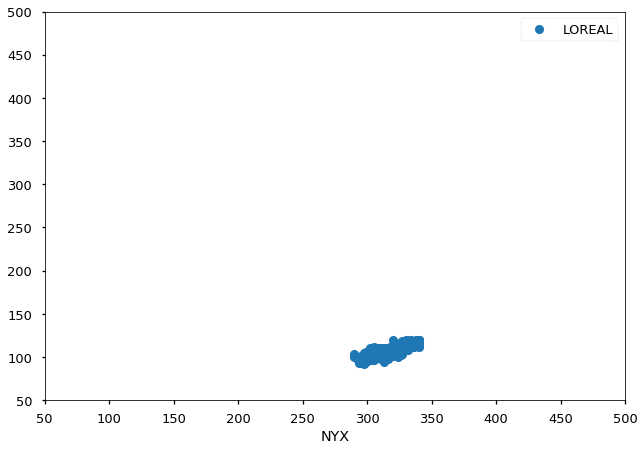

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from scipy import stats


# Ućitavanje podataka:
df=pd.read_csv('makeup.csv')

# plotovanje
df.plot('NYX', 'LOREAL', style='o')

plt.xlim([50,500])
plt.ylim([50,500])
plt.show()

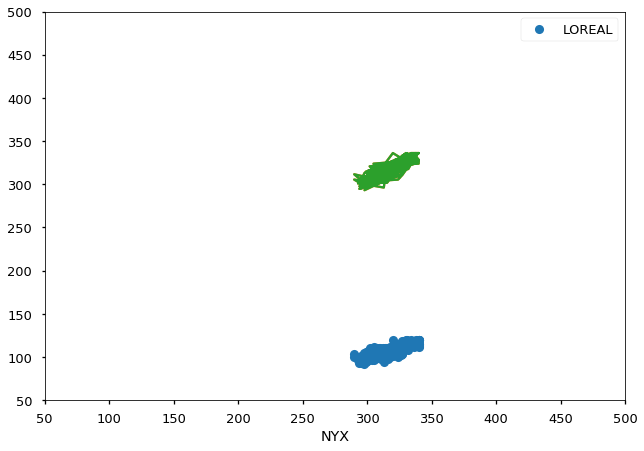

In [16]:
Rez1= sm.ols('NYX ~ LOREAL', df).fit()
Rez2 = sm.ols('NYX ~ LOREAL', df[:-1]).fit()  # isključujemo poslednju tačku koja deluje kao "outlier"
df.plot('NYX', 'LOREAL', style='o')
plt.plot(df.NYX, Rez1.fittedvalues)
plt.plot(df.NYX[:-1], Rez2.fittedvalues)
plt.xlim([50,500])
plt.ylim([50,500])
plt.show()

In [17]:
# Rezime regresije:
print(Rez1.summary())
print(Rez2.summary())

                            OLS Regression Results                            
Dep. Variable:                    NYX   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1079.
Date:                Thu, 16 Jan 2020   Prob (F-statistic):          9.29e-127
Time:                        13:38:36   Log-Likelihood:                -1632.9
No. Observations:                 500   AIC:                             3270.
Df Residuals:                     498   BIC:                             3278.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    151.7968      5.021     30.234      0.0